In [144]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
import numpy as np
import matplotlib.pyplot as plt
import random

## Load Dataset

In [94]:
X_train = np.loadtxt("data/input.csv", delimiter=",")
y_train = np.loadtxt("data/labels.csv", delimiter=",")
X_test = np.loadtxt("data/input_test.csv", delimiter=",")
y_test = np.loadtxt("data/labels_test.csv", delimiter=",")

In [96]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 30000), (2000,), (400, 30000), (400,))

Consists of 2000 images of dogs of 100 * 100 image size with rgb so 3 channels -> 30,000 features

In [97]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [130]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 100, 100, 3), (2000, 1), (400, 100, 100, 3), (400, 1))

In [125]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

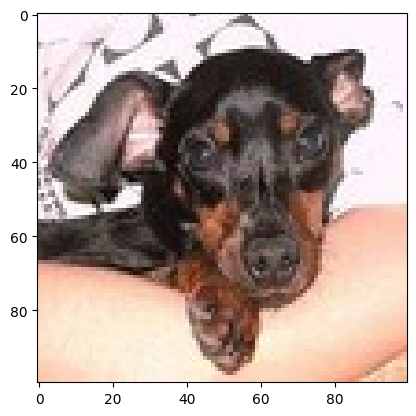

In [139]:
random_ind = random.randint(0, len(X_train))
plt.imshow(X_train_scaled[random_ind].astype(np.float32))
plt.show()

## Model

In [172]:
model = Sequential([
    Input((100, 100, 3)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=64, activation="relu"),
    Dense(units=1, activation="sigmoid")
])

In [173]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [174]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5006 - loss: 113.8647
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6615 - loss: 0.6215
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7820 - loss: 0.4361
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8722 - loss: 0.2777
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9352 - loss: 0.1519


In [176]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5693 - loss: 1.3318


[1.49298095703125, 0.5600000023841858]